In [1]:
!pip install sktime

   ---------------------------------------- 0.0/28.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/28.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/28.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/28.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/28.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/28.9 MB ? eta -:--:--
    --------------------------------------- 0.5/28.9 MB 508.0 kB/s eta 0:00:56
    --------------------------------------- 0.5/28.9 MB 508.0 kB/s eta 0:00:56
   - -------------------------------------- 0.8/28.9 MB 550.1 kB/s eta 0:00:52
   - -------------------------------------- 0.8/28.9 MB 550.1 kB/s eta 0:00:52
   - -------------------------------------- 1.3/28.9 MB 627.1 kB/s eta 0:00:45
   -- ------------------------------------- 1.8/28.9 MB 714.0 kB/s eta 0:00:38
   -- ------------------------------------- 2.1/28.9 MB 743.2 kB/s eta 0:00:37
   -- ---------------------

DEPRECATION: Loading egg at c:\users\rohan\anaconda3\lib\site-packages\huggingface_hub-0.23.0-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.regression.interval_based import TimeSeriesForestRegressor
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.utils.plotting import plot_series


In [26]:
# Example data: Daily temperatures in Melbourne
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'temperature': np.random.normal(loc=20, scale=5, size=100)
}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)


In [27]:
df.head()

,temperature
date,
2023-01-01,18.200808
2023-01-02,24.355896
2023-01-03,20.370972
2023-01-04,20.481751
2023-01-05,13.113458


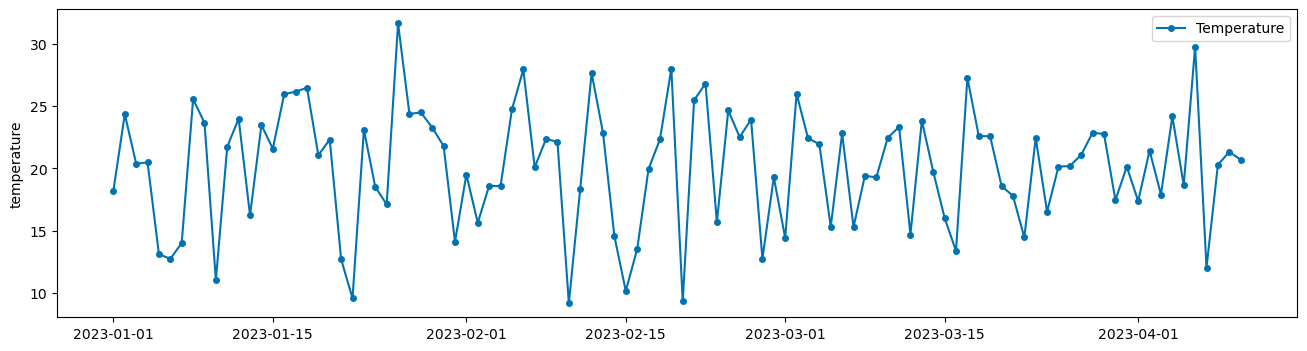

In [28]:
plot_series(df, labels=["Temperature"])
plt.show()


In [35]:
y_train, y_test = temporal_train_test_split(df, test_size=0.2)
forecaster = NaiveForecaster(strategy="drift",)
forecaster.fit(y_train)


NaiveForecaster(strategy='drift')

In [36]:
fh = np.arange(1, len(y_test) + 1)  # Forecasting horizon
y_pred = forecaster.predict(fh)


In [37]:
mape = MeanAbsolutePercentageError()
error = mape(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {error:.2f}")


Mean Absolute Percentage Error: 0.17


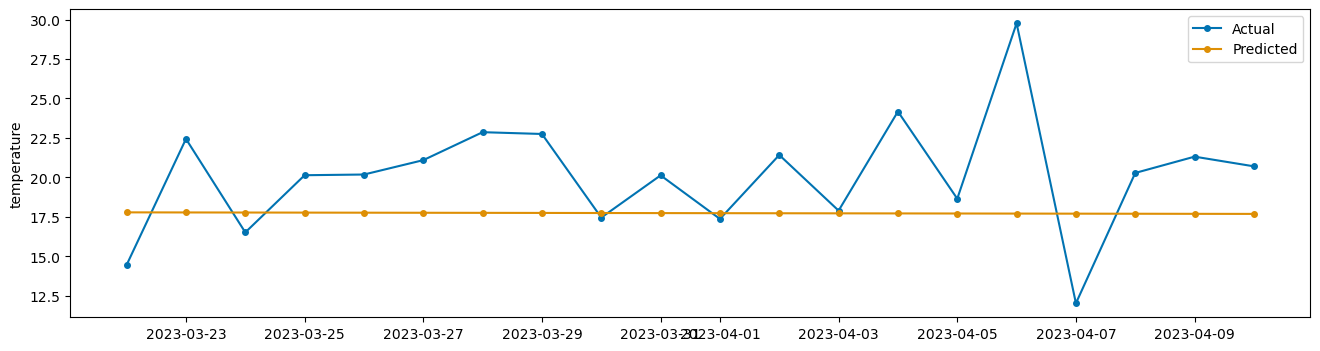

In [38]:
plot_series(y_test, y_pred, labels=["Actual", "Predicted"])
plt.show()


Mean Absolute Percentage Error: 0.23


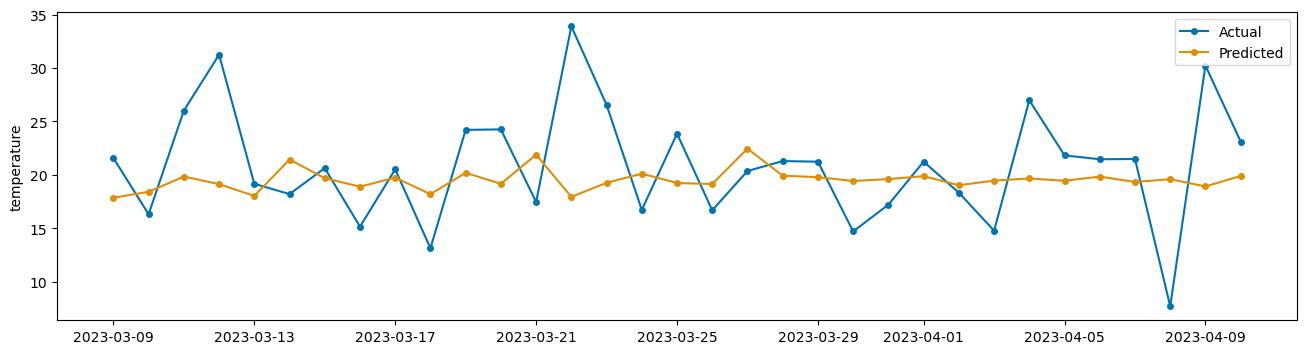

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.utils.plotting import plot_series

# Example data: Daily temperatures in Melbourne
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'temperature': np.random.normal(loc=20, scale=5, size=100)
}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# Split the data
train_size = int(len(df) * 0.67)
train, test = df.iloc[:train_size], df.iloc[train_size:]

y_train = train['temperature']
y_test = test['temperature']

# Train the ARIMA model
forecaster = AutoARIMA(n_jobs=1,sp=19, suppress_warnings=True)
forecaster.fit(y_train)

# Make predictions
fh = np.arange(1, len(y_test) + 1)  # Forecasting horizon
y_pred = forecaster.predict(fh)

# Evaluate the model
mape = MeanAbsolutePercentageError()
error = mape(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {error:.2f}")

# Visualize the results
plot_series(y_test, y_pred, labels=["Actual", "Predicted"])
plt.show()
